# COLX 521 Lecture 2: Corpora

* Some terminology
* Corpora in NLTK
* NLTK corpus readers
* Annotations
* Other corpora and annotations

## Some terminology

* Corpus: a collection of documents
* Document: a sequence of tokens (D)
* Token: a particular instance of a type
* Type: a distinct word form
* Lexicon: a grouping of types
* Vocabulary: a list of all word types in a corpus (V)
* *n*-grams: a fixed length sequence of words (unigram, bigram, trigram)

Let's look at tokens, types, and vocabulary in the first "big" corpus ever: the Brown corpus

In [4]:
#provided code
from nltk.corpus import brown

In [5]:
brown.words()[:10]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [6]:
len(brown.words())

1161192

In [7]:
types = set(brown.words())
list(types)[:10]

['Facilitatory',
 'auspicious',
 'Nonmagical',
 'begotten',
 'Pater',
 'repressive',
 'moderns',
 'disrupt',
 'Asser',
 'metaphysic']

In [8]:
len(types)

56057

An important statistical property shared by all natural language corpora: Most of the tokens come from a small set of common types, and most of the vocabulary consists of rare types.


In [44]:
#provided code
import pylab
from collections import Counter

counts = Counter([word.lower() for word in brown.words()])

def print_zipf(loglog=False):
    ranks = range(1, len(counts) +1)
    frequencies = sorted(counts.values(),reverse=True)
    if loglog:
        pylab.loglog(ranks, frequencies, marker=".")
        pylab.title("Zipf plot for Brown corpus word types (log-log)")
    else:
        pylab.plot(ranks, frequencies, marker=".")
        pylab.title("Zipf plot for Brown corpus word types")

    pylab.xlabel("Frequency rank of word type")
    pylab.ylabel("Absolute frequency of word type")
    pylab.show()
    

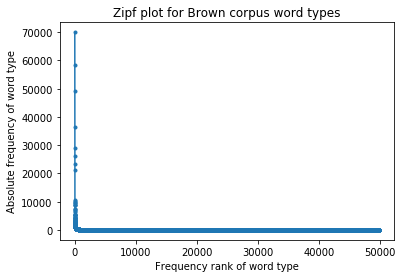

In [45]:
print_zipf()

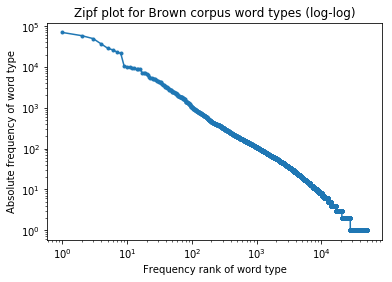

In [46]:
print_zipf(loglog=True)

In [20]:
hapax_legomena_count = 0
for word in counts:
    if counts[word] == 1:
        hapax_count += 1
hapax_count

22010

## Corpora in NLTK

Corpora in NLTK need to be downloaded using the `download()` method

In [12]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [32]:
# provided code
from nltk.corpus import movie_reviews, treebank, brown, gutenberg, switchboard, sinica_treebank, udhr2, genesis, knbc, reuters, state_union, shakespeare, indian, inaugural, europarl_raw, cess_esp, alpino, twitter_samples, floresta, webtext, nps_chat, stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords_set = stopwords.words("English")
stopwords_set.extend(["would", "could", "one", "may"])

def corpus_info(corpus):
    counter = Counter(corpus.words())
    print("Total tokens:", sum(list(counter.values())))
    print("Vocabulary size:", len(counter))
    print("Number of documents:", len(corpus.fileids()))
    print("Most common words:", " ".join([pair[0] for pair in counter.most_common(10)]))
    print("Most common open-class words:", " ".join([pair[0] for pair in counter.most_common(500) if pair[0].isalpha() and pair[0].lower() not in stopwords_set][:10]))
    try:
        print("Categories:",  " ".join(corpus.categories()))
    except:
        print("No categories")
    print("Fileids:", " ".join(corpus.fileids()[:10])) 
    longest_sentence = None
    shortest_sentence = None
    total_length = 0
    sentence_counts = 0
    try:
        for sentence in corpus.sents():
            sentence_counts  += 1
            if longest_sentence == None:
                longest_sentence = shortest_sentence = sentence
            else:
                if len(sentence) > len(longest_sentence):
                    longest_sentence = sentence
                elif len(sentence) < len(shortest_sentence) and len(sentence) > 2:
                    shortest_sentence = sentence
            total_length += len(sentence)
        print("Number of sentences:", sentence_counts)
        print("Avg. sentence length:", total_length/sentence_counts)
        print("Shortest sentence: ", " ".join(shortest_sentence))
        print("Longest sentence: ", " ".join(longest_sentence))

    except:
          print("no sentences")
    print("Wordcloud:")
    wordcloud = WordCloud(stopwords = stopwords_set # set or space-separated string
                          ).generate(" ".join(corpus.words()))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
          
    

### The Brown Corpus

* The original corpus linguistics corpus (Kučera and Francis 1967)
* First major machine-readable corpus
* 500 documents
* 15 text genres, used in studies of genre
* Huge at the time, now a bit small!



Total tokens: 1161192
Vocabulary size: 56057
Number of documents: 500
Most common words: the , . of and to a in that is
Most common open-class words: said time two first like man made new must also
Categories: adventure belles_lettres editorial fiction government hobbies humor learned lore mystery news religion reviews romance science_fiction
Fileids: ca01 ca02 ca03 ca04 ca05 ca06 ca07 ca08 ca09 ca10
Number of sentences: 57340
Avg. sentence length: 20.250994070456922
Shortest sentence:  Ask jail deputies
Longest sentence:  and ( C ) to finance , for not more than three years beyond the end of said period , such activities as are required to correlate , coordinate , and round out the results of studies and research undertaken pursuant to this Act : Provided , That funds available in any one year for research and development may , subject to the approval of the Secretary of State to assure that such activities are consistent with the foreign policy objectives of the United States , be ex

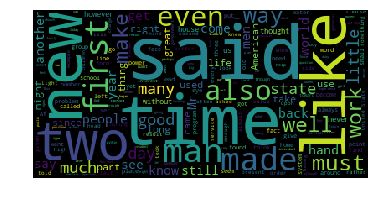

In [33]:
corpus_info(brown)

### The Penn Treebank

* Primarily Wall Street Journal article from early 90s
* 2500 documents (but only 200 in NLTK)
* Only a sample in NLTK, full version requires LDC subscription
* The first large corpus with parse trees, used extensively for parsing and syntactic analysis


Total tokens: 100676
Vocabulary size: 12408
Number of documents: 199
Most common words: , the . of to a in and *-1 0
Most common open-class words: said million company year says market New new trading billion
No categories
Fileids: wsj_0001.mrg wsj_0002.mrg wsj_0003.mrg wsj_0004.mrg wsj_0005.mrg wsj_0006.mrg wsj_0007.mrg wsj_0008.mrg wsj_0009.mrg wsj_0010.mrg
Number of sentences: 3914
Avg. sentence length: 25.722023505365357
Shortest sentence:  New Jersey :
Longest sentence:  The following *ICH*-4 were barred *-3 or , where * noted *-1 *T*-2 , suspended *-3 and consented to findings without *-3 admitting or denying wrongdoing : Edward L. Cole , Jackson , Miss. , $ 10,000 *U* fine ; Rita Rae Cross , Denver , $ 2,500 *U* fine and 30-day suspension ; Thomas Richard Meinders , Colorado Springs , Colo. , $ 2,000 *U* fine , five-day suspension and eight-month suspension as a principal ; Ronald A. Cutrer , Baton Rouge , La. , $ 15,000 *U* fine and one-month suspension ; Karl Grant Hale , Midv

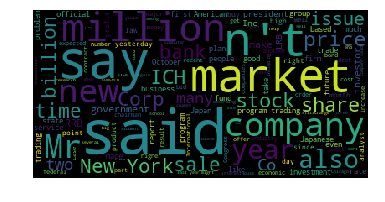

In [34]:
corpus_info(treebank)

### Switchboard corpus

* 36 transcriped telephone conversations
* Useful for study of dialogue acts



Total tokens: 82792
Vocabulary size: 4729
Number of documents: 1
Most common words : , . I the and that you a it to
Most common open-class words: know uh Yeah like think Well Oh really people lot
No categories
Fileids: tagged
no sentences


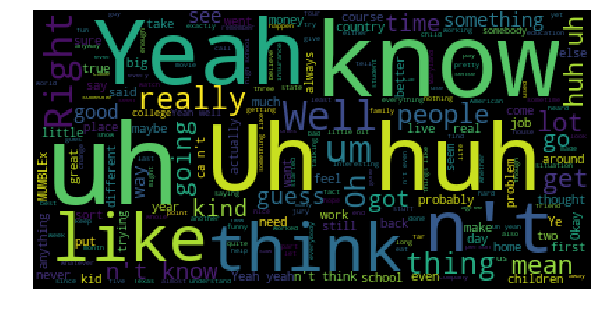

In [21]:
corpus_info(switchboard)

### Reuters

* Reuters news articles
* Standard topic classification corpus

Total tokens: 1720901
Vocabulary size: 41600
Number of documents: 10788
Most common words : . , the of to in said and a mln
Most common open-class words: said mln vs dlrs pct lt cts U year billion
Categories: acq alum barley bop carcass castor-oil cocoa coconut coconut-oil coffee copper copra-cake corn cotton cotton-oil cpi cpu crude dfl dlr dmk earn fuel gas gnp gold grain groundnut groundnut-oil heat hog housing income instal-debt interest ipi iron-steel jet jobs l-cattle lead lei lin-oil livestock lumber meal-feed money-fx money-supply naphtha nat-gas nickel nkr nzdlr oat oilseed orange palladium palm-oil palmkernel pet-chem platinum potato propane rand rape-oil rapeseed reserves retail rice rubber rye ship silver sorghum soy-meal soy-oil soybean strategic-metal sugar sun-meal sun-oil sunseed tea tin trade veg-oil wheat wpi yen zinc
Fileids: test/14826 test/14828 test/14829 test/14832 test/14833 test/14839 test/14840 test/14841 test/14842 test/14843
Number of sentences:54716
Avg. se

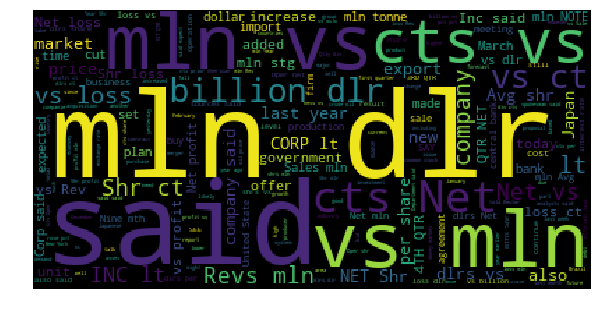

In [22]:
corpus_info(reuters)

### Gutenberg

* Out of copyright documents from Project Gutenberg, mostly classic literature 
* NLTK just has a small sample, but tens of thousands available

Total tokens: 2621613
Vocabulary size: 51156
Number of documents: 18
Most common words : , the and . of : to a in I
Most common open-class words: shall said unto LORD thou man thy God thee upon
No categories
Fileids: austen-emma.txt austen-persuasion.txt austen-sense.txt bible-kjv.txt blake-poems.txt bryant-stories.txt burgess-busterbrown.txt carroll-alice.txt chesterton-ball.txt chesterton-brown.txt
Number of sentences:98552
Avg. sentence length:26.603062342722623
Shortest sentence: " Well !
Longest sentence: By the city ' s quadrangular houses -- in log huts , camping with lumber - men , Along the ruts of the turnpike , along the dry gulch and rivulet bed , Weeding my onion - patch or hosing rows of carrots and parsnips , crossing savannas , trailing in forests , Prospecting , gold - digging , girdling the trees of a new purchase , Scorch ' d ankle - deep by the hot sand , hauling my boat down the shallow river , Where the panther walks to and fro on a limb overhead , where the buck 

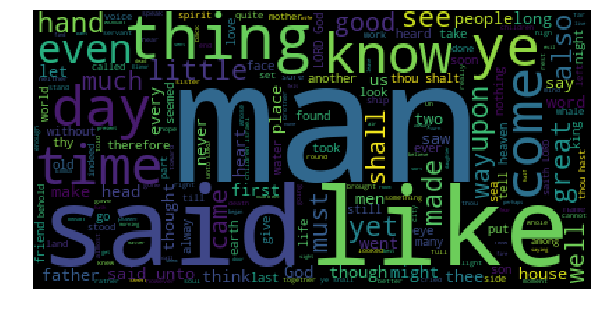

In [23]:
corpus_info(gutenberg)

### Internet-derived copora

* 2000 movie reviews from a IMDB newsgroup (movie_reviews)
* 10K IM chat posts (nps_chat)
* Collection of various text from the web (webtext)
* Sample of tweets (twitter_samples)

Total tokens: 1583820
Vocabulary size: 39768
Number of documents: 2000
Most common words : , the . a and of to ' is in
Most common open-class words: film movie like even good time story much character also
Categories: neg pos
Fileids: neg/cv000_29416.txt neg/cv001_19502.txt neg/cv002_17424.txt neg/cv003_12683.txt neg/cv004_12641.txt neg/cv005_29357.txt neg/cv006_17022.txt neg/cv007_4992.txt neg/cv008_29326.txt neg/cv009_29417.txt
Number of sentences:71532
Avg. sentence length:22.141419224962256
Shortest sentence: not really .
Longest sentence: since that plot is incredibly lame and a track record of what goes on with it wouldn ' t be able to carry a commercial let alone a feature film , and because it ' s a party , there are some more main characters , such as : william ( charlie korsmo , finally surfacing after " dick tracy " ) , the nerd ( and his dominions ) who has come up with a ridiculous plan to publically sabotage mike , who ' s humiliated him for years , but gets too caught up

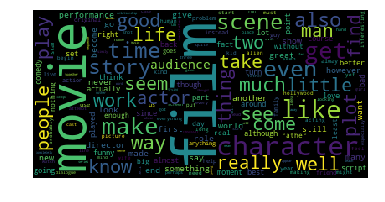

In [8]:
corpus_info(movie_reviews)

Let's plot these corpora in two dimensional space (later in the program we'll look at how this works)

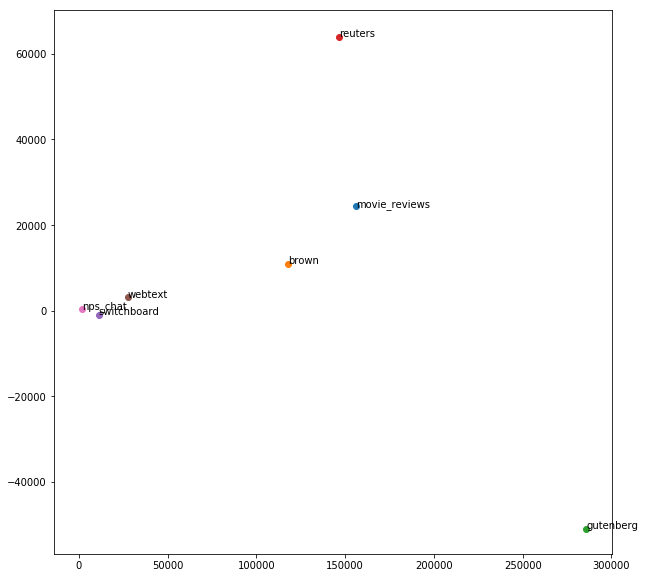

In [11]:
# provided code
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

corpora = [movie_reviews,brown,gutenberg,reuters,switchboard, webtext,nps_chat]

word_dicts = []

for corpus in corpora:
    word_dicts.append(Counter(corpus.words()))

vectorizer = DictVectorizer()

X = vectorizer.fit_transform(word_dicts).toarray()

svd = TruncatedSVD(2)
#svd = PCA(2)

X_reduced = svd.fit_transform(X)

for i in range(len(corpora)):
    plt.scatter(X_reduced[i][0],X_reduced[i][1])
    plt.annotate(str(corpora[i]).split("\\")[-1].split(".")[0].strip("'>'"),(X_reduced[i][0],X_reduced[i][1]))
    
plt.draw()


### Non-English Corpora

* Balanced corpus of Chinese (sinica_treebank)
* Japanese blogs (knbc)
* Samples from various Indian languages (indian)
* News articles from Spanish languagese (cess_esp,cess_cat)
* Portuguese (floresta)
* Dutch (alpino)
* Europearn parliment proceedings (europarl_raw)
* Universal declaration of human rights in 300+ languages

Total tokens: 91627
Vocabulary size: 17273
Number of documents: 1
Most common words : 的 、 在 是 了 有 我 他 就 上
Most common open-class words: 的 在 是 了 有 我 他 就 上 和
No categories
Fileids: parsed
Number of sentences:9999
Avg. sentence length:9.163616361636164
Shortest sentence: 一
Longest sentence: 在 這 棲息 著 黑 、 白 犀牛 、 大象 、 水牛 、 斑馬 、 東非 條紋羚 、 藍色 角馬 、 牛角 條紋羚 、 叢羚 、 大 角 羚羊 、 叢林 野豬 、 長頸鹿 、 疣豬 、 跳羚 、 狒狒 、 猴子 、 獅子 、 花豹 、 鬣狗 以及 獵豹


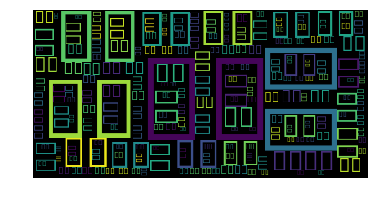

In [9]:
corpus_info(sinica_treebank)

Exercise: Download a NLTK corpus we haven't talked about yet, check out its basic statistics using the corpus info function, and prepare one interesting fact to share

Total tokens: 396733
Vocabulary size: 21538
Number of documents: 6
Most common words : . : , ' I the to a you ?
Most common open-class words: Girl Guy like girl guy know get Yeah page Oh
No categories
Fileids: firefox.txt grail.txt overheard.txt pirates.txt singles.txt wine.txt
Number of sentences:25728
Avg. sentence length:15.422574626865671
Shortest sentence: It works .
Longest sentence: when I click on a search button Mozilla and Firefox dont do anything ; when I commit a filled form 1px font size doesn ' t change when increasing text size Winstripe theme incorrectly positions single tab can ' t delete bookmarks toolbar folder Mute option so that browser process emits no sound Image Alt Tags are mis - marked as " missing " - don ' t show - enh add LongDesc too Hide Tab Bar when only one tab is open pref does not take effect immediately Drag a file from nautilus to a file input won ' t paste the file ' s url mouse gestures using powerbook ' fn ' key breaks uControl endless looping on

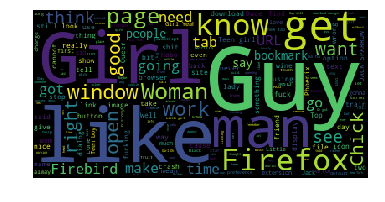

In [19]:
from nltk.corpus import webtext
corpus_info(webtext)

## NLTK corpus readers


Most of the corpora in NLTK have *corpus readers* (code which converts raw text files to Python data structures) which conform to a single unified standard.

The simpliest way to access a corpus is by iterating over the tokens using the `words()` method. Each word is a string.

In [3]:
for word in brown.words():
    print(word)
    if word == "he":
        break

The
Fulton
County
Grand
Jury
said
Friday
an
investigation
of
Atlanta's
recent
primary
election
produced
``
no
evidence
''
that
any
irregularities
took
place
.
The
jury
further
said
in
term-end
presentments
that
the
City
Executive
Committee
,
which
had
over-all
charge
of
the
election
,
``
deserves
the
praise
and
thanks
of
the
City
of
Atlanta
''
for
the
manner
in
which
the
election
was
conducted
.
The
September-October
term
jury
had
been
charged
by
Fulton
Superior
Court
Judge
Durwood
Pye
to
investigate
reports
of
possible
``
irregularities
''
in
the
hard-fought
primary
which
was
won
by
Mayor-nominate
Ivan
Allen
Jr.
.
``
Only
a
relative
handful
of
such
reports
was
received
''
,
the
jury
said
,
``
considering
the
widespread
interest
in
the
election
,
the
number
of
voters
and
the
size
of
this
city
''
.
The
jury
said
it
did
find
that
many
of
Georgia's
registration
and
election
laws
``
are
outmoded
or
inadequate
and
often
ambiguous
''
.
It
recommended
that
Fulton
legislators
act
``
to
have
th

Most corpora are divided into sentences, which are accessed using `sents()` method. Sentences are a lists of words. Some corpora (like the Brown) also have paragraphs (`paras()`), which are lists of sentences.

In [48]:
for sent in brown.sents():
    print(len(sent))
    if len(sent) > 25:
        print(sent)
        break

25
43
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']


In [47]:
for para in brown.paras():
    print(len(para))
    if len(para) > 4:
        print(para)
        break

1
1
1
1
1
1
1
2
2
1
1
1
1
1
2
1
2
1
1
1
5
[['Ask', 'jail', 'deputies'], ['On', 'other', 'matters', ',', 'the', 'jury', 'recommended', 'that', ':', '(', '1', ')'], ['Four', 'additional', 'deputies', 'be', 'employed', 'at', 'the', 'Fulton', 'County', 'Jail', 'and', '``', 'a', 'doctor', ',', 'medical', 'intern', 'or', 'extern', 'be', 'employed', 'for', 'night', 'and', 'weekend', 'duty', 'at', 'the', 'jail', "''", '.'], ['(', '2', ')'], ['Fulton', 'legislators', '``', 'work', 'with', 'city', 'officials', 'to', 'pass', 'enabling', 'legislation', 'that', 'will', 'permit', 'the', 'establishment', 'of', 'a', 'fair', 'and', 'equitable', "''", 'pension', 'plan', 'for', 'city', 'employes', '.']]


Exercise: Print out all the sentences in the Brown that contain the word "ridiculous"

In [5]:
for sent in brown.sents():
    if "ridiculous" in sent:
        print(sent)

['But', 'when', 'tiny', ',', '145-pound', 'Albert', 'Gregory', 'Pearson', 'of', 'the', 'Los', 'Angeles', 'Angels', ',', 'who', 'once', 'caught', 'three', 'straight', 'fly', 'balls', 'in', 'center', 'field', 'because', ',', 'as', 'a', 'teammate', 'explained', ',', '``', 'the', 'other', 'team', 'thought', 'no', 'one', 'was', 'out', 'there', "''", ',', 'hits', 'seven', 'home', 'runs', 'in', 'four', 'months', '(', 'three', 'more', 'than', 'his', 'total', 'in', '1958', ',', '1959', ',', 'and', '1960', ')', ',', 'his', 'achievement', 'borders', 'on', 'the', 'ridiculous', '.']
['This', 'is', 'the', 'year', 'home', 'runs', 'ranged', 'from', 'the', 'sublime', 'to', 'the', 'ridiculous', '.']
['His', 'addle-brained', 'knight-errant', ',', 'self-appointed', 'to', 'the', 'ridiculous', 'position', 'in', 'an', 'age', 'when', 'armor', 'had', 'already', 'been', 'relegated', 'to', 'museums', 'and', 'the', 'chivalrous', 'code', 'of', 'knight-errantry', 'had', 'become', 'a', 'joke', ',', 'is', ',', 'as', 

In many applications, you want to be able to iterate over the documents. Using NLTK, this is a two step process: first, you to get a list of the files using the `fileids()` method. Then you call the appropriate method from those mentioned above with the fileids you want as the argument.

In [15]:
for filename in brown.fileids():
    print(brown.words(filename)[:5])

['The', 'Fulton', 'County', 'Grand', 'Jury']
['Austin', ',', 'Texas', '--', 'Committee']
['Several', 'defendants', 'in', 'the', 'Summerdale']
['Oslo', 'The', 'most', 'positive', 'element']
['East', 'Providence', 'should', 'organize', 'its']
['Plainfield', '--', 'James', 'P.', 'Mitchell']
['Resentment', 'welled', 'up', 'yesterday', 'among']
['Appointment', 'of', 'William', 'S.', 'Pfaff']
['City', 'Controller', 'Alexander', 'Hemphill', 'charged']
['Vincent', 'G.', 'Ierulli', 'has', 'been']
['Miami', ',', 'Fla.', ',', 'March']
['Austin', ',', 'Texas', '--', 'A']
['Rookie', 'Ron', 'Nischwitz', 'continued', 'his']
['Philadelphia', ',', 'Jan.', '23', '--']
['If', 'the', 'Cardinals', 'heed', 'Manager']
['Romantic', 'news', 'concerns', 'Mrs.', 'Joan']
['After', 'being', 'closed', 'for', 'seven']
['``', 'A', 'Night', 'in', 'New']
['The', 'Baltimore', 'and', 'Ohio', 'Railroad']
['London', ',', 'Feb.', '9', '--']
['St.', 'Johns', ',', 'Mich.', ',']
['Emory', "University's", 'Board', 'of', 'Truste

Exercise: Count the number of documents in the Brown which have at least 100 sentences

In [20]:
num_docs = 0

for filename in brown.fileids():
    if len(brown.sents(filename)) >= 100:
        num_docs += 1
        
print(num_docs)

314


## Annotations

Nearly all the corpora in NLTK have some kind of annotation associated with them. One common annotation is some kind of label for documents in the corpus. In the Brown, for instance, the label is associated with the genre, for the Reuters corpus it is a topic (there are multiple topics for each texts), and for the Movie Review corpus it is the polarity (positive or negative) of the review. A list of categories is available using the `categories()` method

In [24]:
print(brown.categories())
print(reuters.categories())
print(movie_reviews.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-mea

In order to get texts in a particular category, you can either get the fileids for that category (the category is the argument to fileids) and use `words()`/`sents()`, or access them directly by using the categories keyword for `words()`/`sents()`  

In [37]:
for sent in reuters.sents(categories="potato"):
    print(sent)

['U', '.', 'K', '.']
['POTATO', 'FUTURES', 'TRADING', 'NOT', 'TO', 'BE', 'SUSPENDED', 'Trading', 'on', 'the', 'London', 'potato', 'futures', 'market', 'will', 'not', 'be', 'suspended', ',', 'Richard', 'Harris', ',', 'Chairman', 'of', 'the', 'London', 'Potato', 'Futures', 'Association', '(', 'LPFA', '),', 'said', 'in', 'a', 'statement', 'to', 'floor', 'members', '.']
['It', 'was', 'in', 'response', 'to', 'strong', 'representations', 'by', 'the', 'Potato', 'Marketing', 'Board', '(', 'PMB', ')', 'complaining', 'of', 'a', 'gross', 'distortion', 'of', 'price', 'which', 'they', 'say', 'will', 'result', 'in', 'large', 'deliveries', 'into', 'the', 'physical', 'market', 'when', 'the', 'April', 'futures', 'position', 'expires', '.']
['The', 'PMB', 'had', 'sought', 'an', 'immediate', 'suspension', 'in', 'futures', 'trading', 'and', 'asked', 'the', 'LPFA', 'to', 'take', 'action', 'to', 'restore', 'the', 'relationship', 'between', 'futures', 'and', 'physicals', '.']
['Farmers', 'and', 'merchants', 

In [38]:
for filename in reuters.fileids("potato"):
    print(reuters.words(filename))

['U', '.', 'K', '.', 'POTATO', 'FUTURES', 'TRADING', ...]
['USDA', 'SPRING', 'POTATO', 'ESTIMATES', 'The', 'U', ...]
['USDA', 'REVISES', '1986', 'SUMMER', 'POTATOES', ...]
['U', '.', 'K', '.', 'GRAIN', '/', 'POTATO', 'FUTURES', ...]
['USDA', 'WINTER', '/', 'SPRING', 'POTATO', ...]
['IRELAND', 'PUT', 'ON', 'COLORADO', 'BEETLE', 'ALERT', ...]


Or you can iterate through all the texts and look up the category for a particular fileid using `categories(fileid)`.

In [28]:
for fileid in brown.fileids():
    print(fileid)
    print(brown.categories(fileid))

ca01
['news']
ca02
['news']
ca03
['news']
ca04
['news']
ca05
['news']
ca06
['news']
ca07
['news']
ca08
['news']
ca09
['news']
ca10
['news']
ca11
['news']
ca12
['news']
ca13
['news']
ca14
['news']
ca15
['news']
ca16
['news']
ca17
['news']
ca18
['news']
ca19
['news']
ca20
['news']
ca21
['news']
ca22
['news']
ca23
['news']
ca24
['news']
ca25
['news']
ca26
['news']
ca27
['news']
ca28
['news']
ca29
['news']
ca30
['news']
ca31
['news']
ca32
['news']
ca33
['news']
ca34
['news']
ca35
['news']
ca36
['news']
ca37
['news']
ca38
['news']
ca39
['news']
ca40
['news']
ca41
['news']
ca42
['news']
ca43
['news']
ca44
['news']
cb01
['editorial']
cb02
['editorial']
cb03
['editorial']
cb04
['editorial']
cb05
['editorial']
cb06
['editorial']
cb07
['editorial']
cb08
['editorial']
cb09
['editorial']
cb10
['editorial']
cb11
['editorial']
cb12
['editorial']
cb13
['editorial']
cb14
['editorial']
cb15
['editorial']
cb16
['editorial']
cb17
['editorial']
cb18
['editorial']
cb19
['editorial']
cb20
['editorial']
cb21

Another extremely common annotation is a part-of-speech (POS) tag. POS tags are accessed using by using `tagged_words()` and `tagged_sents()`. The difference between these methods and their non-tagged equivalent is the string corresponding to a word token is replaced with a (token,POS) *tuple*.

In [32]:
brown.tagged_words()[0]

('The', 'AT')
AT
[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]
AT
NP-TL
NN-TL
JJ-TL
NN-TL
VBD
NR
AT
NN
IN
NP$
JJ
NN
NN
VBD
``
AT
NN
''
CS
DTI
NNS
VBD
NN
.


In [39]:
first_tagged_sent = brown.tagged_sents()[0]
first_tagged_sent

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

In [41]:
for word,pos in first_tagged_sent:
    print(pos) 

AT
NP-TL
NN-TL
JJ-TL
NN-TL
VBD
NR
AT
NN
IN
NP$
JJ
NN
NN
VBD
``
AT
NN
''
CS
DTI
NNS
VBD
NN
.


It is worth noting that there are various different POS tag sets, even for just English. In recent years there has been a push towards a unversal set that works for all languages.

In [38]:
brown.tagged_sents(tagset='universal')[0]

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]


The other main kind of annotation included in NLTK are parses. For those corpora which have this kind of annotation, like the Penn Treebank, use the `parsed_sents()`. Much more about syntactic trees and parsing in COLX 535!

In [1]:
treebank.parsed_sents()[0].draw()


NameError: name 'treebank' is not defined

## Other corpora and annotations

NLTK is just a small, easy to access sample of full range of corpora out there. Here are some others, ranging for well-known and very useful to more obscure but cool! We will use some of these (and many others) later in the program...

* The entirety of Wikipedia is [downloadable](https://en.wikipedia.org/wiki/Wikipedia:Database_download). It is popular as a raw source of language data for various languages and also has interesting annotations, for instance the page structure and the edit history! 
* The [Gigaword corpus](https://catalog.ldc.upenn.edu/LDC2012T21) is a huge newspaper corpus with lots of useful annotation, though it requires an LDC subscription
* [The British National Corpus](http://www.natcorp.ox.ac.uk/) and [American National Corpus](http://www.anc.org/) are (like the Brown) balanced corpora reflecting a diversity of language genres and modalities in their respective countries, but at a much larger scale than the Brown.
* There are lots of big corpora of online reviews, e.g. [Amazon](https://snap.stanford.edu/data/web-Amazon.html) and [Yelp](https://www.yelp.com/dataset/challenge)
* Questions and answers from [Yahoo answers](https://webscope.sandbox.yahoo.com/catalog.php?datatype=l&guccounter=1)
* Large corpus of [Reddit comments](https://www.kaggle.com/reddit/reddit-comments-may-2015)
* Corpus of [blogger.com blogs](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) with user ids and background (gender/age)
* The [Cambridge Learner Corpus](https://ilexir.co.uk/datasets/index.html) written by non-native learners of English, with error annotations
* The [Enron e-mail corpus](https://aws.amazon.com/de/datasets/enron-email-data/), over a million internal e-mails, used for studies of power relationships
* The [Hansards](https://www.isi.edu/natural-language/download/hansard/), proceedings of Canadian parliment, English-French parallel text used for machine translation
* The [Cornell Movie Dialogue Corpus](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html), scripts from 617 movies with character annotations
* [Jeopardy](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/) questions and answers
* ...

